In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the Excel file
file_path = 'D:\RD\BITS -PG_AIML\Course 1 Regression\Mini_project\Mini_Project_Dataset.xlsx'
dataset = pd.read_excel(file_path)


# Analysing the dataset
# EDA (Exploratory Data Analysis)

In [3]:
# Displaying the first few rows of the dataset
print("Dataset Preview:")
dataset.head()


Dataset Preview:


,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.02
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.134


In [4]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())



Missing Values in Each Column:
Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
dtype: int64


In [5]:
#Checking data for no of rows, datatypes.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [6]:
#As we have 3 columns with object datatype , we need  to convert them into numeric, also will be converting any non-numeric data into null
# The pd.to_numeric() function allows us to handle errors.
#errors='coerce'- Converts non-numeric values to NaN.
dataset = dataset.apply(pd.to_numeric, errors='coerce')

#Checking the above changes
print("\nData after conversion of datatypes\n")
dataset.info()


Data after conversion of datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [7]:
# Droping rows with missing values 
dataset = dataset.dropna()


In [8]:
#Checking the shape of data - num of rows & columns remaining
dataset.shape

(153, 6)

In [9]:
#Checking data's statistics to verify any outliers etc
dataset.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,400.935948,26.353595,28.528105,31.300654,8.930378,3925.960254
std,362.456125,10.097525,10.818749,11.706630,4.266436,48506.767659
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.100000,5.936400,3.375600
50%,273.000000,25.200000,27.300000,29.400000,7.680000,4.247600
75%,680.000000,32.800000,36.000000,39.800000,11.932800,5.727600
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


In [10]:
# Above data shows there are some outliers in a column as the max value is very big 
#Removing outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows where column values are outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Selecting numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns  
dataset = remove_outliers(dataset, numeric_columns)

print("\nDataset after removing outliers:")
dataset.describe()


Dataset after removing outliers:


,Cost,Weight,Weight1,Length,Height,Width
count,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000
mean,376.954667,25.740667,27.87600,30.620000,8.908906,4.388633
std,323.201126,9.202408,9.87509,10.767849,4.305662,1.684046
min,0.000000,7.500000,8.40000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.00000,22.875000,5.922225,3.357600
50%,271.000000,25.000000,26.75000,29.100000,7.600400,4.236500
75%,642.500000,32.650000,35.00000,39.575000,12.248700,5.577375
max,1250.000000,52.000000,56.00000,59.700000,18.957000,8.142000


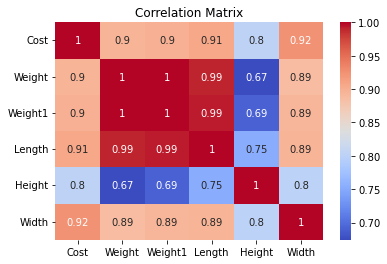

In [11]:
# Plotting correlation matrix
corr_matrix = dataset.corr()

# Creating a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#Due to multicolinearity among weight and weight1, will be dropping column 'weight1' 
df = dataset.drop('Weight1', axis=1)

#Verifying the removal of column 'Weight1' and displaying final data before feeding to the model
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 158
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    150 non-null    float64
 1   Weight  150 non-null    float64
 2   Length  150 non-null    float64
 3   Height  150 non-null    float64
 4   Width   150 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


,Cost,Weight,Length,Height,Width
0,242.0,23.2,30.0,11.5200,4.0200
1,290.0,24.0,31.2,12.4800,4.3056
2,340.0,23.9,31.1,12.3778,4.6961
3,363.0,26.3,33.5,12.7300,4.4555
4,430.0,26.5,34.0,12.4440,5.1340


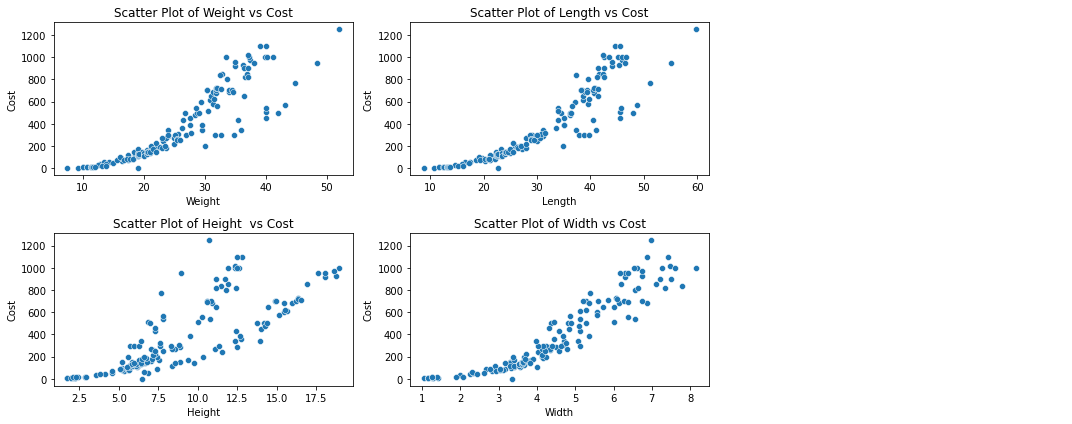

In [13]:
# Plotting Scatter plot for all input features and cost
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

sns.scatterplot(x='Weight', y='Cost', data=df, ax=axes[0,0])
axes[0,0].set_title("Scatter Plot of Weight vs Cost")

sns.scatterplot(x='Length', y='Cost', data=df, ax=axes[0,1])
axes[0,1].set_title("Scatter Plot of Length vs Cost")

sns.scatterplot(x='Height', y='Cost', data=df, ax=axes[1,0])
axes[1,0].set_title("Scatter Plot of Height  vs Cost")

sns.scatterplot(x='Width', y='Cost', data=df, ax=axes[1,1])
axes[1,1].set_title("Scatter Plot of Width vs Cost")


axes[0, 2].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Model Building using Multiple Linear Regression 



# Normal SK-Learn library

In [14]:
# Selecting features (X) and target (y)
# All columns except 'cost' are features
X = df.drop(columns=['Cost'])  

# 'Cost' column is the target
y = df['Cost'] 

print(X)
print(y)
df.shape
df.head()

     Weight  Length   Height   Width
0      23.2    30.0  11.5200  4.0200
1      24.0    31.2  12.4800  4.3056
2      23.9    31.1  12.3778  4.6961
3      26.3    33.5  12.7300  4.4555
4      26.5    34.0  12.4440  5.1340
..      ...     ...      ...     ...
154    11.5    13.4   2.0904  1.3936
155    11.7    13.5   2.4300  1.2690
156    12.1    13.8   2.2770  1.2558
157    13.2    15.2   2.8728  2.0672
158    13.8    16.2   2.9322  1.8792

[150 rows x 4 columns]
0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Cost, Length: 150, dtype: float64


,Cost,Weight,Length,Height,Width
0,242.0,23.2,30.0,11.5200,4.0200
1,290.0,24.0,31.2,12.4800,4.3056
2,340.0,23.9,31.1,12.3778,4.6961
3,363.0,26.3,33.5,12.7300,4.4555
4,430.0,26.5,34.0,12.4440,5.1340


In [15]:
#Preprocessing/Scaling of the data
from sklearn import preprocessing

sx  = preprocessing.MinMaxScaler()
sy  = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('Cost',axis='columns'))
#scaled_y = sy.fit_transform(df['Cost'].values.reshape(df.shape[0],1)) NOt using this as i want to see actual predicted values for y

In [16]:
#Verfying the training dataset scaling
print(f" Shape of scaled_X: {scaled_X.shape}")
#print(f" Shape of scaled_y: {scaled_y.shape}")

 Shape of scaled_X: (150, 4)


In [17]:
#Converting y into an array
y = y.to_numpy()
print(f" Shape of scaled_X: {scaled_X.shape}")
print(f" Shape of y: {y.shape}")

 Shape of scaled_X: (150, 4)
 Shape of y: (150,)


In [18]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)



In [19]:
# Print shapes of train and test sets
print("\nTraining and Testing Set Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")




Training and Testing Set Shapes:
X_train: (120, 4), X_test: (30, 4), y_train: (120,), y_test: (30,)


In [20]:
# Initialize and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [21]:
# Making predictions on the test set
y_pred = model.predict(X_test)
print(f"\n Predicted Value for y:\n  {y_pred}\n")


 Predicted Value for y:
  [  99.09466222  645.58587538  848.20297164  141.84521961   96.77565142
  849.78484764  299.00082103 -182.80213388  -79.33117967  164.04816364
  701.0657103   601.82147336  153.98921105  525.86833276  614.86300777
   30.14719207  628.9395172   -22.66582099  763.70669688  610.66298029
  849.35739996  513.89376534  796.27050914  464.60637574  622.02540388
 -163.73047786  724.22769229 -172.48544099  217.98910227  888.91552611]



In [22]:
# Displaying coefficients and intercept
print("\nModel Coefficients and Intercept:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Model Coefficients and Intercept:
Coefficients: [ 2361.86323927 -1731.96407105   520.50864199   376.34455706]
Intercept: -248.80086994047952


In [23]:
#  Calculating the R squared, RMSE, and MSE for the model 

r2_sklearn = r2_score(y_test, y_pred)
mse_sklearn = mean_squared_error(y_test, y_pred)
rmse_sklearn = np.sqrt(mse_sklearn)

print("\nModel Performance:\n")
print(f"R-squared: {r2_sklearn}")
print(f"Mean Squared Error: {mse_sklearn}")
print(F"RMSE: {rmse_sklearn}")




Model Performance:

R-squared: 0.9026723540566751
Mean Squared Error: 12494.594733515873
RMSE: 111.7792231745948


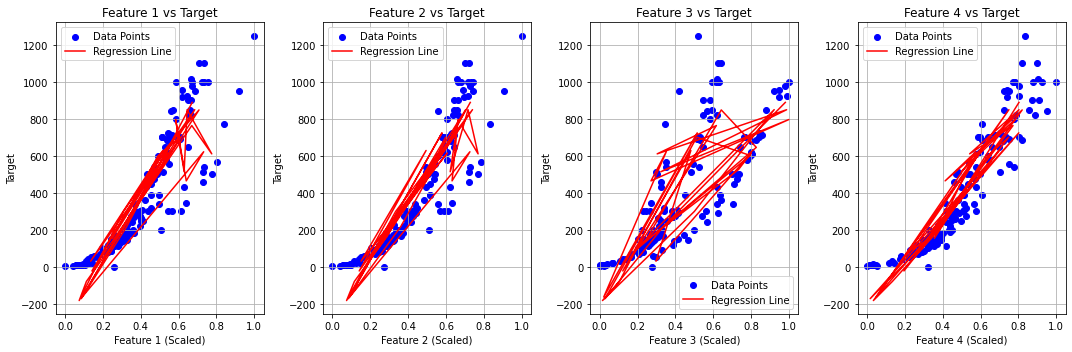

In [24]:
num_features = scaled_X.shape[1]
plt.figure(figsize=(15, 5))

for i in range(num_features):
    plt.subplot(1, num_features, i + 1)  # Create a subplot for each feature
    plt.scatter(scaled_X[:, i], y, color='blue', label='Data Points')  # Actual data
    plt.plot(X_test[:, i], y_pred, color='red', label='Regression Line')  # Predicted regression
    plt.xlabel(f"Feature {i+1} (Scaled)")
    plt.ylabel("Target")
    plt.title(f"Feature {i+1} vs Target")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Batch Gradient Descent 

In [25]:
#Creating GD Class

class GDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        
        self.coef_ = None
        self.intercept_ =None
        self.lr = learning_rate
        self.epochs = epochs
    
        
        
    def fit(self, X_train, y_train):
        #initializing the coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        
        for i in range(self.epochs):
            #updating all coefficients & intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr *intercept_der)
            
            coef_der = -(2) * np.dot((y_train - y_hat), X_train)/X_train[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)       
            
           
        
        print("\nModel Coefficients and Intercept:\n")
        print(f"Coefficients: { self.coef_}")
        print(f"Intercept: {self.intercept_}")
            
    def predict(self,X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
        
        

In [26]:
#Applying the Batch Gradeint Descent Model on training data
gdr = GDRegressor(epochs = 1000, learning_rate = 0.001)
gdr.fit(X_train, y_train)



Model Coefficients and Intercept:

Coefficients: [363.90754346 116.45874814 136.46765752 467.5867992 ]
Intercept: -76.62777980614145


In [27]:
# Making predictions on the test set
y_pred_= gdr.predict(X_test)
print(f"\n Predicted Value for y:\n  {y_pred}\n")


 Predicted Value for y:
  [  99.09466222  645.58587538  848.20297164  141.84521961   96.77565142
  849.78484764  299.00082103 -182.80213388  -79.33117967  164.04816364
  701.0657103   601.82147336  153.98921105  525.86833276  614.86300777
   30.14719207  628.9395172   -22.66582099  763.70669688  610.66298029
  849.35739996  513.89376534  796.27050914  464.60637574  622.02540388
 -163.73047786  724.22769229 -172.48544099  217.98910227  888.91552611]



In [28]:
#Calculating the R squared, RMSE, and MSE for the Batch Gradient Descent model
r2_gd = r2_score(y_test,y_pred_)
mse_gd = mean_squared_error(y_test, y_pred_)
rmse_gd = np.sqrt(mse_gd)


print("\nModel Performance:\n")
print(f"R-squared: {r2_gd}")
print(f"Mean Squared Error: {mse_gd}")
print(F"RMSE: {rmse_gd}")


Model Performance:

R-squared: 0.8462763901980407
Mean Squared Error: 19734.5182536015
RMSE: 140.47960084511024


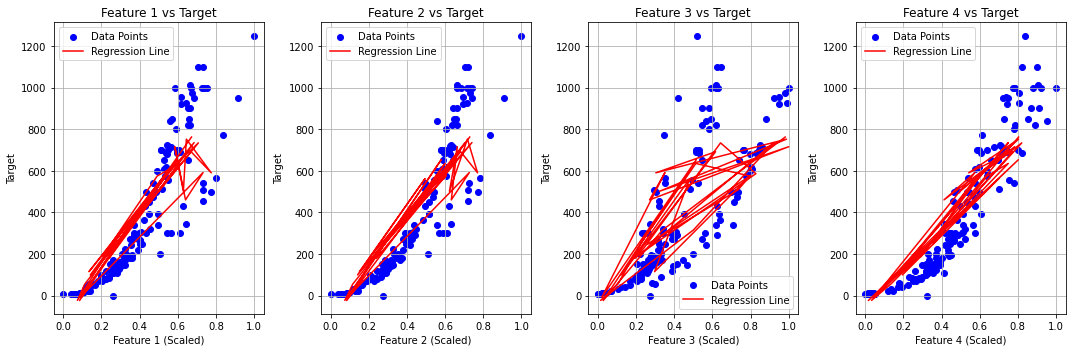

In [29]:
num_features = scaled_X.shape[1]
plt.figure(figsize=(15, 5))

for i in range(num_features):
    plt.subplot(1, num_features, i + 1)  # Create a subplot for each feature
    plt.scatter(scaled_X[:, i], y, color='blue', label='Data Points')  # Actual data
    plt.plot(X_test[:, i], y_pred_, color='red', label='Regression Line')  # Predicted regression
    plt.xlabel(f"Feature {i+1} (Scaled)")
    plt.ylabel("Target")
    plt.title(f"Feature {i+1} vs Target")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Stochastic Gradient Descent 

In [30]:
#Creating Stochastic Gradient Descent Class

class SGDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        
        self.coef_s = None
        self.intercept_s =None
        self.lr = learning_rate
        self.epochs = epochs
        
        
        
    def fit(self, X_train, y_train):
        #initializing the coefficients
        self.intercept_s = 0
        self.coef_s = np.ones(X_train.shape[1])
        
        
        for i in range(self.epochs):
         
            
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                 #updating all coefficients & intercept
                y_hat = np.dot(X_train[idx], self.coef_s) + self.intercept_s

                intercept_der_s = - 2* (y_train[idx] - y_hat)
                self.intercept_s = self.intercept_s - (self.lr *intercept_der_s)
                
                coef_der_s = -2 * np.dot((y_train - y_hat),X_train)
                self.coef_s = self.coef_s -(self.lr *coef_der_s)
                
        
                
        print("\nModel Coefficients and Intercept:\n")
        print(f"Coefficients: { self.coef_s}")
        print(f"Intercept: {self.intercept_s}")
            
    def predict(self,X_test):
        return np.dot(X_test, self.coef_s) + self.intercept_s

In [31]:
#Applying the Stochastic Gradeint Descent Model on training data
sgd = SGDRegressor(learning_rate = 0.001,epochs = 5)
sgd.fit(X_train, y_train)




Model Coefficients and Intercept:

Coefficients: [353.90098885 212.53865169 254.71718357 575.04186112]
Intercept: -180.70932110358234


In [32]:
# Make predictions on the test data
y_pred_sg = sgd.predict(X_test)
print(f"\n Predicted Value for y:\n  {y_pred_sg}\n")


 Predicted Value for y:
  [ 157.08324062  697.59434817  854.79267504  213.0659746   144.68244571
  885.7261963   338.67611762 -115.64562615  -12.57012428  238.72132786
  724.0483216   682.11244665  234.66291474  594.56058099  686.1960568
   78.50568334  633.04614461   42.65400563  802.24827829  646.62914472
  913.85359963  542.60024506  872.21423321  486.85415679  653.47908288
  -96.29288511  745.98501213 -115.76663503  323.22810705  923.95142538]



In [33]:
#  Calculating the R squared, RMSE, and MSE for the model -

r2_sgd = r2_score(y_test, y_pred_sg)
mse_sgd = mean_squared_error(y_test, y_pred_sg)
rmse_sgd = np.sqrt(mse_sgd)

print("\nModel Performance:\n")
print(f"R-squared: {r2_sgd}")
print(f"Mean Squared Error: {mse_sgd}")
print(F"RMSE: {rmse_sgd}")


Model Performance:

R-squared: 0.905866556765206
Mean Squared Error: 12084.533769306048
RMSE: 109.92967647230682


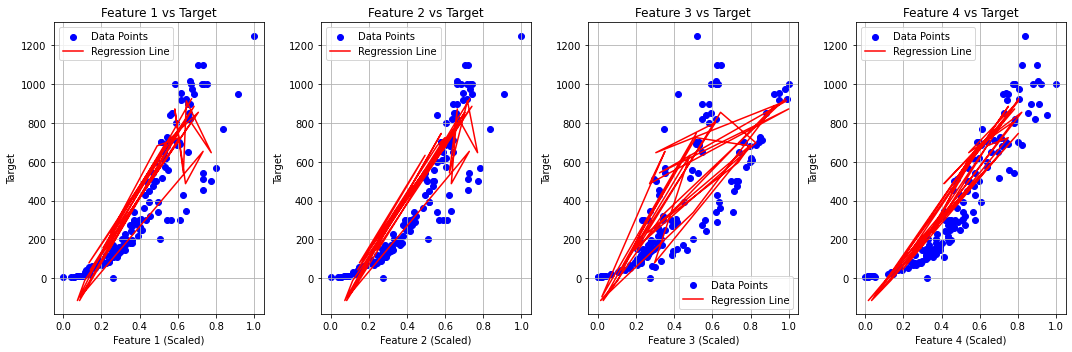

In [34]:
num_features = scaled_X.shape[1]
plt.figure(figsize=(15, 5))

for i in range(num_features):
    plt.subplot(1, num_features, i + 1)  # Create a subplot for each feature
    plt.scatter(scaled_X[:, i], y, color='blue', label='Data Points')  # Actual data
    plt.plot(X_test[:, i], y_pred_sg, color='red', label='Regression Line')  # Predicted regression
    plt.xlabel(f"Feature {i+1} (Scaled)")
    plt.ylabel("Target")
    plt.title(f"Feature {i+1} vs Target")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Mini Batch Gradient Descent

In [35]:
# Creating Mini Batch Gradient Descent Class

import random

class MBGDRegressor:
    def __init__(self, batch_size, learning_rate = 0.01, epochs = 100):
        
        self.coef_m = None
        self.intercept_m =None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
        
    def fit(self, X_train, y_train):
        #initializing the coefficients
        self.intercept_m = 0
        self.coef_m = np.ones(X_train.shape[1])
        
        # Total number of samples
        n_samples = X_train.shape[0]
        
        
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                
            #updating all coefficients & intercept
                y_hat = np.dot(X_train[idx],self.coef_m) + self.intercept_m
                intercept_der_m = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_m = self.intercept_m - (self.lr *intercept_der_m)

                coef_der_m = -(2) * np.dot((y_train[idx] - y_hat), X_train[idx])
                self.coef_m = self.coef_m - (self.lr * coef_der_m)   
                
              
        
        print("\nModel Coefficients and Intercept:\n")
        print(f"Coefficients: { self.coef_m}")
        print(f"Intercept: {self.intercept_m}")
            
    def predict(self,X_test):
        return np.dot(X_test, self.coef_m) + self.intercept_m


In [36]:
#Applying the Mini Batch Gradeint Descent Model on training data
mbr = MBGDRegressor(batch_size=int(scaled_X.shape[0]/10),learning_rate = 0.01, epochs= 18)
mbr.fit(X_train, y_train)


Model Coefficients and Intercept:

Coefficients: [270.52479896 248.52301477 202.6085858  350.76255528]
Intercept: -82.67355545752635


In [37]:
# Make predictions on the test data
y_pred_mb = mbr.predict(X_test)
print(f"\n Predicted Value for y:\n  {y_pred_mb}\n")


 Predicted Value for y:
  [169.0670939  592.53737352 701.61520658 215.12685546 166.63785135
 736.91770793 314.29683943 -29.37327278  44.7421701  233.57890709
 597.97177018 574.44302316 227.92699167 514.9187319  585.58416231
 114.8298037  523.5634299   83.87202487 663.68395915 570.25300538
 752.1615636  482.20287274 717.69651378 447.52972826 569.22430932
 -14.5327621  608.38275668 -27.01899719 301.41798236 760.8704078 ]



In [38]:
#  Calculating the R squared, RMSE, and MSE for the model 
r2_mbgd = r2_score(y_test, y_pred_mb)
mse_mbgd = mean_squared_error(y_test, y_pred_mb)
rmse_mbgd = np.sqrt(mse_mbgd)

print("\nModel Performance:\n")
print(f"R-squared: {r2_mbgd}")
print(f"Mean Squared Error: {mse_mbgd}")
print(F"RMSE: {rmse_mbgd}")


Model Performance:

R-squared: 0.8419863549644436
Mean Squared Error: 20285.258499261123
RMSE: 142.4263265666187


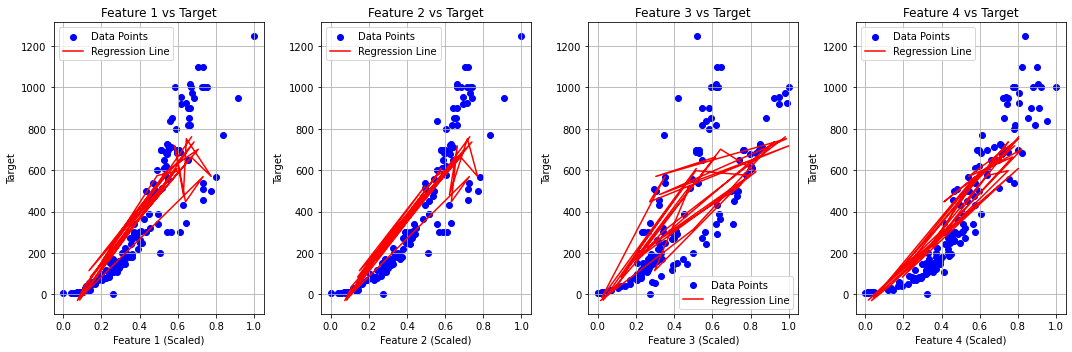

In [39]:
num_features = scaled_X.shape[1]
plt.figure(figsize=(15, 5))

for i in range(num_features):
    plt.subplot(1, num_features, i + 1)  # Create a subplot for each feature
    plt.scatter(scaled_X[:, i], y, color='blue', label='Data Points')  # Actual data
    plt.plot(X_test[:, i], y_pred_mb, color='red', label='Regression Line')  # Predicted regression
    plt.xlabel(f"Feature {i+1} (Scaled)")
    plt.ylabel("Target")
    plt.title(f"Feature {i+1} vs Target")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

In [40]:
metrics = {
    'SK-Learn LR': [r2_sklearn, mse_sklearn, rmse_sklearn],
    'Gradient Descent': [r2_gd, mse_gd, rmse_gd],
    'SGD': [r2_sgd, mse_sgd, rmse_sgd],
    'Mini-Batch': [r2_mbgd, mse_mbgd, rmse_mbgd]
    
}

metrics_df = pd.DataFrame(metrics, index=['R-squared', 'MSE', 'RMSE'])

# All Model Performance:



In [41]:
# Output the evaluation results
print("Evaluation Results:\n")
print(metrics_df)

Evaluation Results:

            SK-Learn LR  Gradient Descent           SGD    Mini-Batch
R-squared      0.902672          0.846276      0.905867      0.841986
MSE        12494.594734      19734.518254  12084.533769  20285.258499
RMSE         111.779223        140.479601    109.929676    142.426327
